# Grabbing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
import imblearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/GMSP/ml_data.csv', sep = ',')
df

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label,acc_vec,acc_y
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991,0,10.176551,9.941461
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454,0,10.059553,9.835590
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454,0,9.503762,9.270792
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454,0,9.830320,9.548032
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454,0,9.967466,9.853534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15161680,1709396983975,8.0,199.547104,-0.320905,-8.949738,-3.971979,-0.012879,0.015905,-0.007625,559.0,1.035811,1,9.796805,8.949738
15161681,1709396983975,8.0,199.547104,-0.418253,-8.929102,-3.950296,-0.006455,0.005278,-0.000082,560.0,1.035811,1,9.772852,8.929102
15161682,1709396983975,12.0,199.547104,-0.226697,-8.914597,-4.338940,0.044719,0.032351,-0.018600,561.0,0.302453,1,9.917047,8.914597
15161683,1709396983975,12.0,199.547104,-0.372943,-8.951382,-4.416550,0.053263,0.029213,-0.016357,562.0,0.302453,1,9.988606,8.951382


In [ ]:
df['label'].value_counts()

0    10649897
1     4511788
Name: label, dtype: int64

There are roughly twice as many data rows for safe trips as compared to dangerous trips

# Feature Engineering

* Mean
* Maximum
* Minimum

In [ ]:
trainingDf = df.drop([
    'acceleration_x', 'acceleration_y', 'acceleration_z'
], axis = 1)
trainingDf

,bookingID,Accuracy,Bearing,gyro_x,gyro_y,gyro_z,second,Speed,label,acc_vec,acc_y
0,0,12.0,143.298294,-0.016245,-0.094040,0.070732,0.0,3.442991,0,10.176551,9.941461
1,0,8.0,143.298294,-0.047092,-0.078874,0.043187,1.0,0.228454,0,10.059553,9.835590
2,0,8.0,143.298294,-0.028965,-0.032652,0.015390,2.0,0.228454,0,9.503762,9.270792
3,0,8.0,143.298294,-0.022413,0.005049,-0.025753,3.0,0.228454,0,9.830320,9.548032
4,0,8.0,143.298294,-0.014297,-0.046206,0.021902,4.0,0.228454,0,9.967466,9.853534
...,...,...,...,...,...,...,...,...,...,...,...
15161680,1709396983975,8.0,199.547104,-0.012879,0.015905,-0.007625,559.0,1.035811,1,9.796805,8.949738
15161681,1709396983975,8.0,199.547104,-0.006455,0.005278,-0.000082,560.0,1.035811,1,9.772852,8.929102
15161682,1709396983975,12.0,199.547104,0.044719,0.032351,-0.018600,561.0,0.302453,1,9.917047,8.914597
15161683,1709396983975,12.0,199.547104,0.053263,0.029213,-0.016357,562.0,0.302453,1,9.988606,8.951382


In [ ]:
#* Generate statistical values for each of the columns except for 'label' and 'bookingID'
trainingDf = trainingDf.groupby(by=['bookingID'])['Accuracy', 'Bearing', 'gyro_x', 'gyro_y', 'gyro_z', 'second', 'Speed', 'acc_vec', 'acc_y'].agg(["mean", "max", "min"]).reset_index()
trainingDf.columns = ['_'.join(col).strip() for col in trainingDf.columns.values]

trainingDf = trainingDf.drop([
    'bookingID_'
], axis = 1)
trainingDf['label'] = df.groupby(['bookingID'])['label'].max().values

trainingDf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Accuracy_mean,Accuracy_max,Accuracy_min,Bearing_mean,Bearing_max,Bearing_min,gyro_x_mean,gyro_x_max,gyro_x_min,gyro_y_mean,gyro_y_max,gyro_y_min,gyro_z_mean,gyro_z_max,gyro_z_min,second_mean,second_max,second_min,Speed_mean,Speed_max,Speed_min,acc_vec_mean,acc_vec_max,acc_vec_min,acc_y_mean,acc_y_max,acc_y_min,label
0,10.190083,48.000,4.000,173.809683,359.979767,0.037464,0.004188,0.438371,-0.392537,-0.004647,0.469724,-0.609930,-0.004626,0.372807,-0.731892,892.571281,1589.0,0.0,8.813780,22.946083,0.0,9.825899,11.678808,6.457339,9.556420,10.707236,6.119916,0
1,3.716766,7.709,3.000,124.153846,337.000000,0.000000,-0.002572,0.126536,-0.125367,-0.008649,0.324212,-0.678183,0.000537,0.235131,-0.121265,582.304142,1034.0,0.0,7.882584,21.882141,0.0,9.852686,11.676235,6.970526,9.525570,11.331690,6.623425,1
2,3.909297,8.000,3.000,173.677083,354.000000,1.000000,0.004883,0.282162,-0.155218,-0.013447,0.431695,-0.462000,0.002610,0.255884,-0.125907,339.802083,825.0,0.0,3.123590,9.360483,0.0,9.890718,11.552551,8.234988,9.807037,11.248303,7.941810,1
3,10.000000,10.000,10.000,152.348346,353.855377,2.271227,-0.023903,0.215437,-0.420507,0.022815,0.652628,-0.506531,-0.001170,0.505220,-0.348189,546.015741,1094.0,0.0,6.047019,19.780001,0.0,9.773134,11.299784,7.703982,9.368335,10.687198,7.064984,1
4,4.583003,12.000,3.000,196.673772,359.000000,0.000000,0.003768,0.362202,-0.253551,0.000585,0.532123,-0.621802,0.002873,0.278402,-0.336128,542.695088,1094.0,0.0,4.510423,16.394695,0.0,9.893672,12.903771,7.218154,9.520904,11.339286,6.857203,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19894,3.917319,37.127,3.000,170.539510,359.000000,0.000000,0.009402,0.711924,-0.752320,0.000145,0.728177,-1.302339,-0.011502,0.745666,-0.735071,505.100817,1090.0,8.0,2.616723,6.275580,0.0,8.181751,13.638037,1.316183,3.418881,11.229149,0.035914,1
19895,11.932785,25.000,4.000,179.133723,358.273376,10.027151,-0.017448,0.291135,-0.641901,0.005795,0.477245,-0.404243,-0.001223,0.233631,-0.496440,423.699588,809.0,0.0,7.588134,24.059151,0.0,9.861593,12.039766,7.345273,8.663124,10.713367,6.295920,1
19896,9.411838,13.936,5.953,198.736842,359.000000,0.000000,0.000391,0.122772,-0.172302,0.000431,0.489258,-0.683594,0.001363,0.284973,-0.252991,575.219512,989.0,0.0,12.715802,26.340000,0.0,9.723265,13.135711,8.026692,9.072683,11.238205,7.637329,1
19897,5.403858,48.000,3.000,204.366448,359.000000,0.000000,0.003381,0.342585,-0.696496,-0.002669,1.108360,-1.048605,-0.000504,0.433020,-0.372100,541.102156,1079.0,0.0,6.219235,19.287226,0.0,9.755701,11.897526,6.175481,8.884889,11.190841,5.542746,1


In [ ]:
trainingDf.isnull().sum()

Accuracy_mean    0
Accuracy_max     0
Accuracy_min     0
Bearing_mean     0
Bearing_max      0
Bearing_min      0
gyro_x_mean      0
gyro_x_max       0
gyro_x_min       0
gyro_y_mean      0
gyro_y_max       0
gyro_y_min       0
gyro_z_mean      0
gyro_z_max       0
gyro_z_min       0
second_mean      0
second_max       0
second_min       0
Speed_mean       0
Speed_max        0
Speed_min        0
acc_vec_mean     0
acc_vec_max      0
acc_vec_min      0
acc_y_mean       0
acc_y_max        0
acc_y_min        0
label            0
dtype: int64

In [ ]:
!pip install scikit-plot

#* Pre-model training stuff
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV

#* Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#* Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

#* Model Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

#* Saving model
import pickle

In [ ]:
y = trainingDf["label"].values
x = trainingDf.drop([
    "label"
], axis = 1).values

In [ ]:
#* Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [ ]:
print("Before oversampling")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")

#* Oversampling the minority class
ros = RandomOverSampler(sampling_strategy = "minority", random_state = 29)
x_train, y_train = ros.fit_resample(x_train, y_train)

print("After oversampling")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")

Before oversampling
x_train: (15919, 27), y_train: (15919,)
After oversampling
x_train: (23884, 27), y_train: (23884,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Classification models

              precision    recall  f1-score   support

           0       0.84      0.67      0.74      2983
           1       0.38      0.60      0.47       997

    accuracy                           0.65      3980
   macro avg       0.61      0.64      0.61      3980
weighted avg       0.72      0.65      0.67      3980



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,0,1
0,2000,983
1,395,602


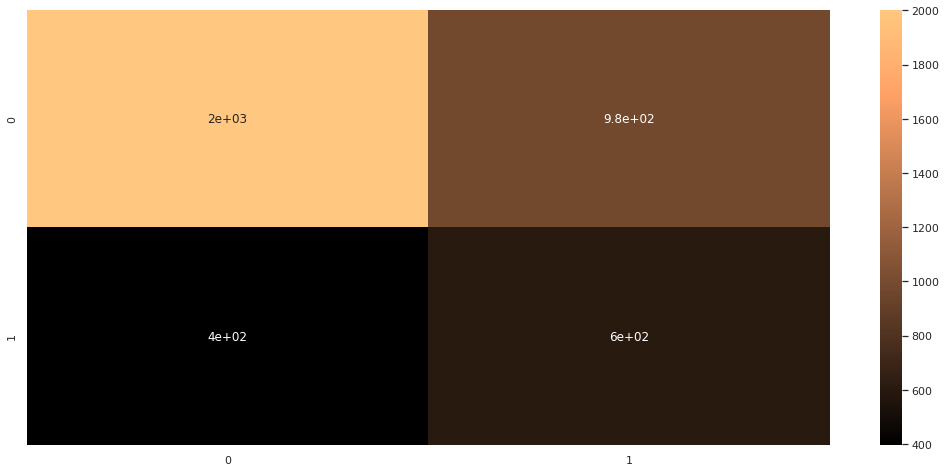

In [ ]:
#* Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lrPreds = lr_model.predict(x_test)

#* Evaluation stuff
lrReport = classification_report(y_test, lrPreds)
print(lrReport)
lrScore = f1_score(y_test, lrPreds)

#* Confusion Matrix
cm = confusion_matrix(y_test, lrPreds)
sns.heatmap(cm, annot=True, cmap='copper')

cm = pd.DataFrame(cm)
cm

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2983
           1       0.25      1.00      0.40       997

    accuracy                           0.25      3980
   macro avg       0.13      0.50      0.20      3980
weighted avg       0.06      0.25      0.10      3980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1
0,0,2983
1,0,997


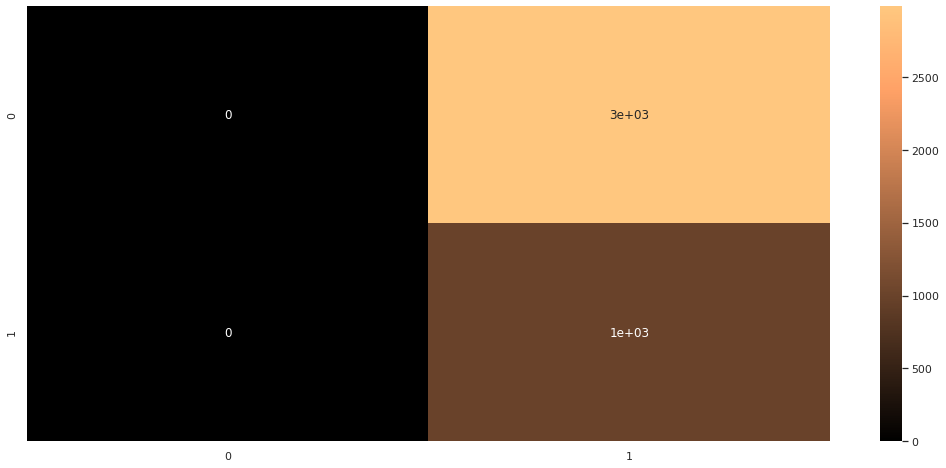

In [ ]:
#* SVC
svc_model = SVC()
svc_model.fit(x_train, y_train)
svcPreds = svc_model.predict(x_test)

#* Evaluation
svcReport = classification_report(y_test, svcPreds)
print(svcReport)
svcScore = f1_score(y_test, svcPreds)

#* Confusion Matrix
cm = confusion_matrix(y_test, svcPreds)
sns.heatmap(cm, annot=True, cmap='copper')

cm = pd.DataFrame(cm)
cm

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2983
           1       0.37      0.37      0.37       997

    accuracy                           0.69      3980
   macro avg       0.58      0.58      0.58      3980
weighted avg       0.69      0.69      0.69      3980



,0,1
0,2360,623
1,624,373


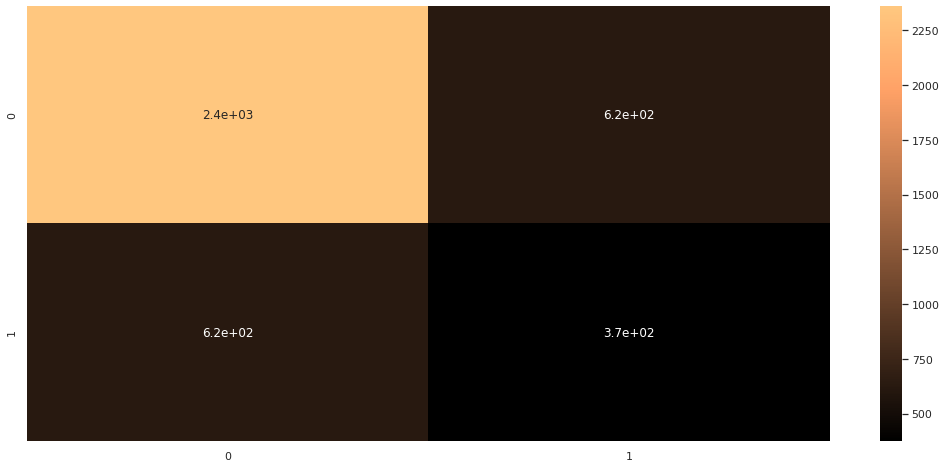

In [ ]:
#* Decision Tree Classifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)
dtcPreds = dtc_model.predict(x_test)

#* Evaluation
dtcReport = classification_report(y_test, dtcPreds)
print(dtcReport)
dtcScore = f1_score(y_test, dtcPreds)

#* Confusion Matrix
cm = confusion_matrix(y_test, dtcPreds)
sns.heatmap(cm, annot=True, cmap='copper')

cm = pd.DataFrame(cm)
cm

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2983
           1       0.36      0.36      0.36       997

    accuracy                           0.68      3980
   macro avg       0.57      0.57      0.57      3980
weighted avg       0.68      0.68      0.68      3980



,0,1
0,2344,639
1,638,359


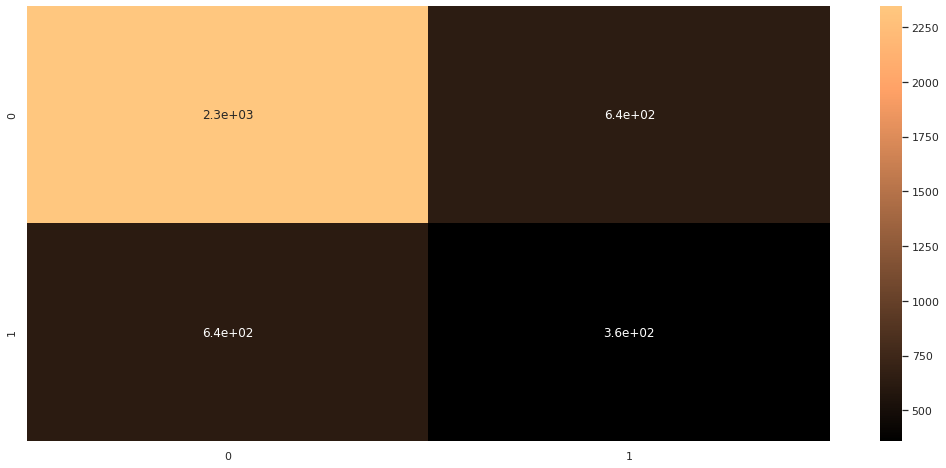

In [ ]:
#* AdaBoosting Classifier on Decision Tree Classifier
baseEstimator = DecisionTreeClassifier()
abc_dtc_model = AdaBoostClassifier(base_estimator = baseEstimator)
abc_dtc_model.fit(x_train, y_train)
abc_dtc_Preds = abc_dtc_model.predict(x_test)

#* Evaluation
abc_dtc_Report = classification_report(y_test, abc_dtc_Preds)
print(abc_dtc_Report)
abc_dtc_Score = f1_score(y_test, abc_dtc_Preds)

#* Confusion Matrix
cm = confusion_matrix(y_test, abc_dtc_Preds)
sns.heatmap(cm, annot=True, cmap='copper')

cm = pd.DataFrame(cm)
cm

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      2977
           1       0.43      0.60      0.50      1003

    accuracy                           0.70      3980
   macro avg       0.63      0.66      0.64      3980
weighted avg       0.74      0.70      0.71      3980



,0,1
0,2171,806
1,406,597


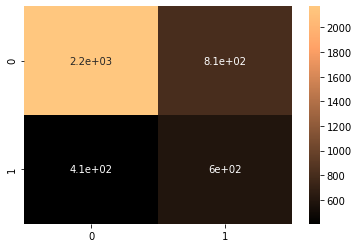

In [ ]:
#* Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier()
gbc_model.fit(x_train, y_train)
gbcPreds = gbc_model.predict(x_test)

#* Evaluation
gbcReport = classification_report(y_test, gbcPreds)
print(gbcReport)
gbcScore = f1_score(y_test, gbcPreds)

#* Confusion Matrix
cm = confusion_matrix(y_test, gbcPreds)
sns.heatmap(cm, annot=True, cmap='copper')

cm = pd.DataFrame(cm)
cm

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      2983
           1       0.36      0.37      0.37       997

    accuracy                           0.68      3980
   macro avg       0.57      0.58      0.58      3980
weighted avg       0.68      0.68      0.68      3980



,0,1
0,2332,651
1,628,369


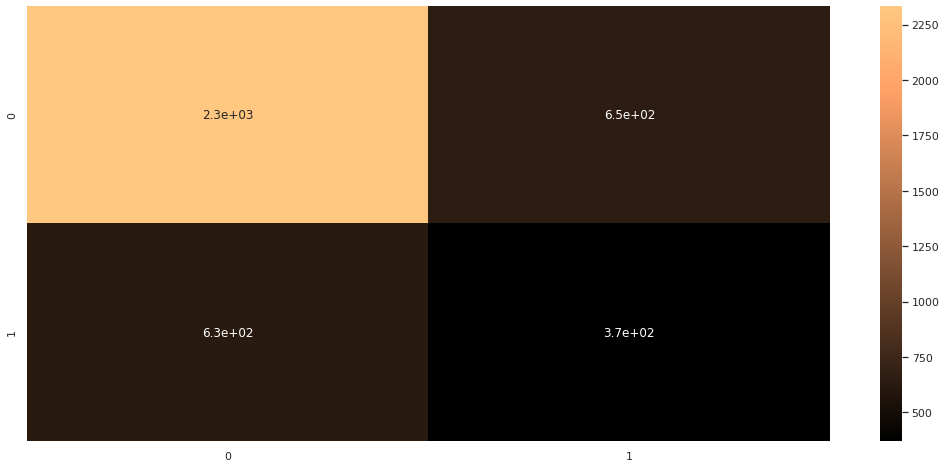

In [ ]:
#* AdaBoosting Classifier
baseEstimator = DecisionTreeClassifier()
abc_gbc_model = AdaBoostClassifier(base_estimator = baseEstimator)
abc_gbc_model.fit(x_train, y_train)
abc_gbc_Preds = abc_gbc_model.predict(x_test)

#* Evaluation
abc_gbc_Report = classification_report(y_test, abc_gbc_Preds)
print(abc_gbc_Report)
abc_gbc_Score = f1_score(y_test, abc_gbc_Preds)

#* Confusion Matrix
cm = confusion_matrix(y_test, abc_gbc_Preds)
sns.heatmap(cm, annot=True, cmap='copper')

cm = pd.DataFrame(cm)
cm

In [ ]:
modelSummary = pd.DataFrame({
    'Model': ["Logistic Regression", "Support Vector Machine", "Decision Tree Classifier", "AdaBoosting on Decision Tree", "Gradient Boosting Classifier", "AdaBoosting on Gradient Boosting Classifier"],
    'f1Score': [lrScore, svcScore, dtcScore, abc_dtc_Score, gbcScore, abc_gbc_Score]
})
modelSummary.sort_values(by="f1Score", ascending = False)

,Model,f1Score
4,Gradient Boosting Classifier,0.480296
0,Logistic Regression,0.466305
1,Support Vector Machine,0.400643
2,Decision Tree Classifier,0.374310
5,AdaBoosting on Gradient Boosting Classifier,0.365890
3,AdaBoosting on Decision Tree,0.359900


In [ ]:
print(f"GBC ROC AUC Score: {roc_auc_score(y_test, gbcPreds)}")

GBC ROC AUC Score: 0.6502356550038987


In [ ]:
pickle.dump(gbc_model, open("drive/MyDrive/Colab Notebooks/GMSP/gbc1", "wb"))

### Hyperparameter tuning for GBC

In [ ]:
search = GridSearchCV(estimator = GradientBoostingClassifier(),
                      param_grid = {
                            'learning_rate': [0.1, 0.01],
                            'min_samples_split': [4, 8, 10],
                            'max_depth': [5, 7],
                            'subsample': [0.2, 0.4]
                      },
                      scoring = 'r2',
                      n_jobs = 8,
                      verbose = 1)

In [ ]:
search.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed: 11.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [ ]:
search.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_samples_split': 4,
 'subsample': 0.4}

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      2977
           1       0.42      0.61      0.50      1003

    accuracy                           0.69      3980
   macro avg       0.64      0.67      0.64      3980
weighted avg       0.74      0.69      0.71      3980



,0,1
0,2150,827
1,392,611


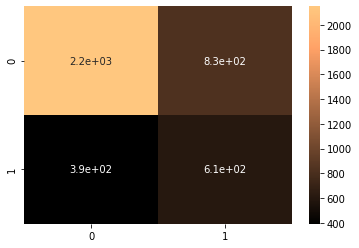

In [ ]:
#* Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2,
                                       min_samples_split = 7, subsample = 0.7,
                                       n_estimators = 1000)
gbc_model.fit(x_train, y_train)
gbcPreds = gbc_model.predict(x_test)

#* Evaluation
gbcReport = classification_report(y_test, gbcPreds)
print(gbcReport)
gbcScore = f1_score(y_test, gbcPreds)
rocAucScore = roc_auc_score(y_test, gbcPreds)

#* Confusion Matrix
cm = confusion_matrix(y_test, gbcPreds)
sns.heatmap(cm, annot=True, cmap='copper')

cm = pd.DataFrame(cm)
cm

In [ ]:
print(f"GBC f1 score: {gbcScore}")
print(f"GBC roc-auc score: {rocAucScore}")

GBC f1 score: 0.5006145022531749
GBC roc-auc score: 0.6656880215919256


In [ ]:
pickle.dump(gbc_model, open("drive/MyDrive/Colab Notebooks/GMSP/gbc2", "wb"))

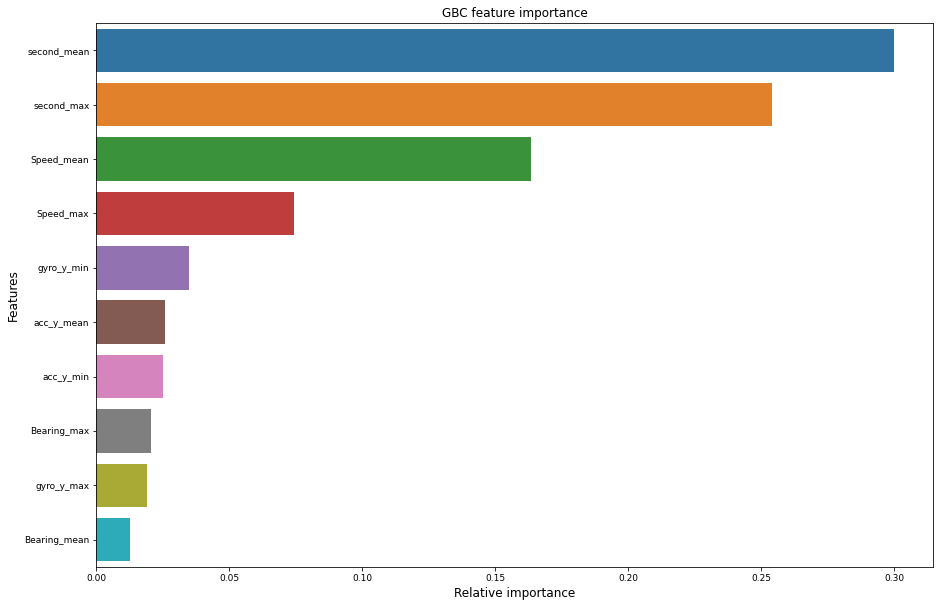

In [ ]:
# Showing feature importance for models that are able to
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, sharex="all", figsize=(15, 10))

names_classifiers = [("GBC",gbc_model)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:10]
        g = sns.barplot(y=trainingDf.columns[indices][:10],x = classifier.feature_importances_[indices][:10] , orient='h')
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

# Model Training (Regression into CLassification)

In [ ]:
#* Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lrPreds = lr_model.predict(x_test)

lrScore = lr_model.score(x_test, y_test)
lr_rocAuc = roc_auc_score(y_test, lrPreds)

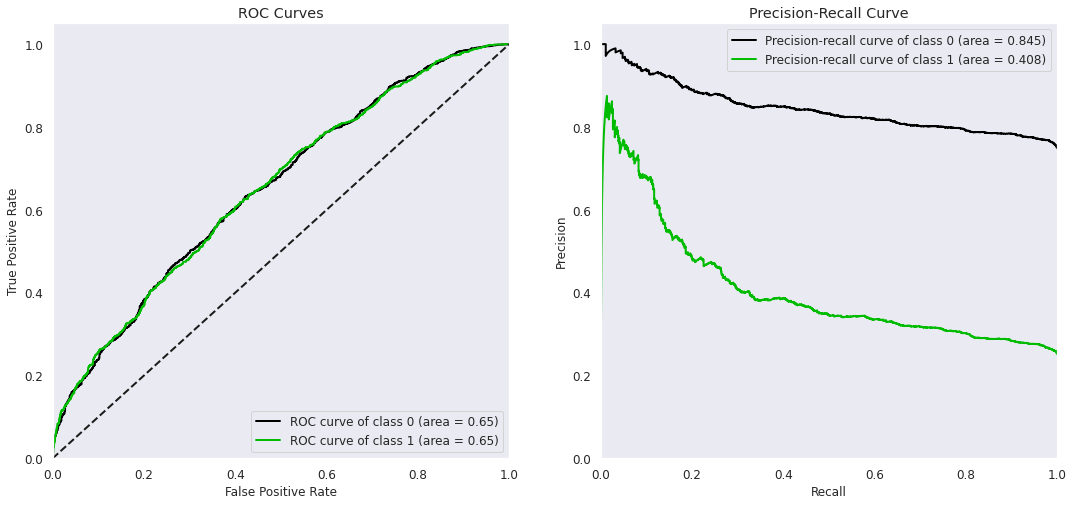

In [ ]:
#* Plot roc-auc curve
sns.set(style = 'dark', rc = {
    'figure.figsize': (18, 8)
})
fig, axes = plt.subplots(1, 2)

skplt.metrics.plot_roc(y_test, np.column_stack((1 - lrPreds, lrPreds)), plot_macro=False, plot_micro=False, ax=axes[0])
skplt.metrics.plot_precision_recall(y_test, np.column_stack((1 - lrPreds, lrPreds)), plot_micro=False, ax=axes[1])

In [ ]:
#* K Nearest Neighbours Regressor
knr_model = KNeighborsRegressor()
knr_model.fit(x_train, y_train)
knrPreds = knr_model.predict(x_test)

knrScore = knr_model.score(x_test, y_test)
knr_rocAuc = roc_auc_score(y_test, knrPreds)

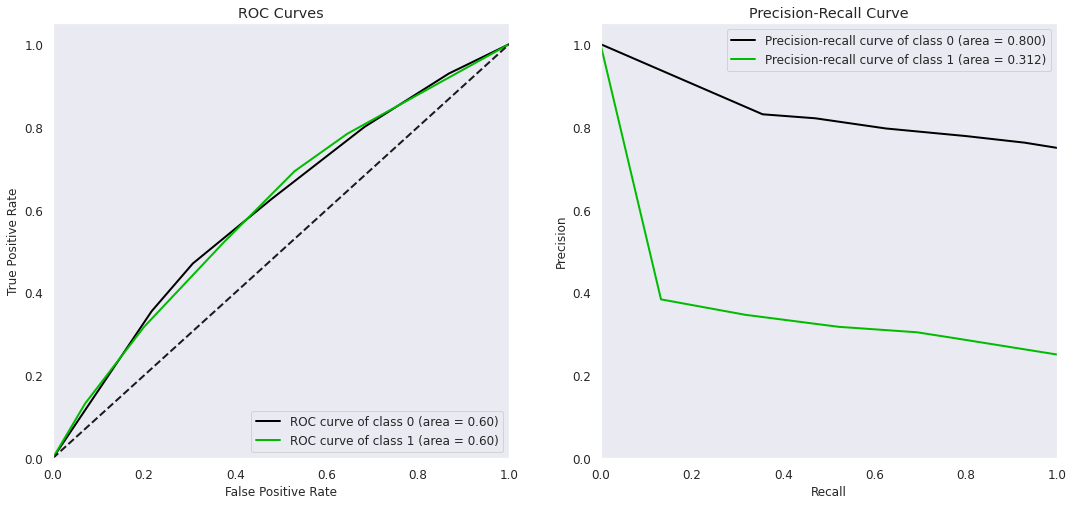

In [ ]:
#* Plot roc-auc curve
sns.set(style = 'dark', rc = {
    'figure.figsize': (18, 8)
})
fig, axes = plt.subplots(1, 2)

skplt.metrics.plot_roc(y_test, np.column_stack((1 - knrPreds, knrPreds)), plot_macro=False, plot_micro=False, ax=axes[0])
skplt.metrics.plot_precision_recall(y_test, np.column_stack((1 - knrPreds, knrPreds)), plot_micro=False, ax=axes[1])

In [ ]:
#* Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor()
gbr_model.fit(x_train, y_train)
gbrPreds = gbr_model.predict(x_test)

gbrScore = gbr_model.score(x_test, y_test)
gbr_rocAuc = roc_auc_score(y_test, gbrPreds)

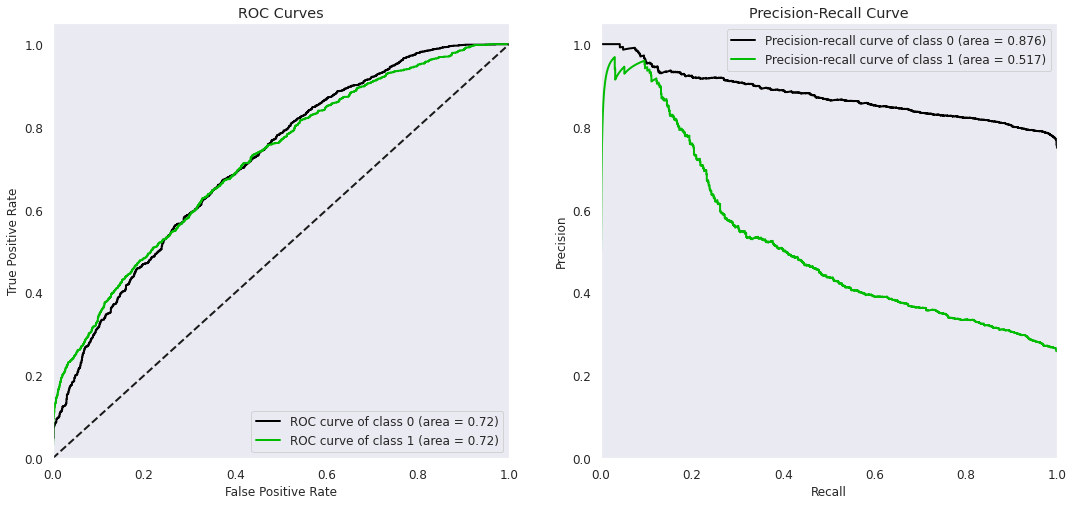

In [ ]:
#* Plot roc-auc curve
sns.set(style = 'dark', rc = {
    'figure.figsize': (18, 8)
})
fig, axes = plt.subplots(1, 2)

skplt.metrics.plot_roc(y_test, np.column_stack((1 - gbrPreds, gbrPreds)), plot_macro=False, plot_micro=False, ax=axes[0])
skplt.metrics.plot_precision_recall(y_test, np.column_stack((1 - gbrPreds, gbrPreds)), plot_micro=False, ax=axes[1])

In [ ]:
modelSummary = pd.DataFrame({
    'Model': ["Linear Regression", "K Nearest Neighbours Regressor", "Gradient Boosting Regressor"],
    'roc-auc': [lr_rocAuc, knr_rocAuc, gbr_rocAuc],
    'r2Score': [lrScore, knrScore, gbrScore]
})
modelSummary.sort_values(by=["roc-auc", "r2Score"], ascending = False)

,Model,roc-auc,r2Score
2,Gradient Boosting Regressor,0.716443,-0.082757
0,Linear Regression,0.650555,-0.223878
1,K Nearest Neighbours Regressor,0.602740,-0.483468


In [ ]:
# Classifying trips whereby the prediction is greater than 0.8 as dangerous trips
classificationResult = np.where(gbcPreds > 0.8, 1, 0)

              precision    recall  f1-score   support

           0       0.84      0.70      0.76      2983
           1       0.40      0.60      0.48       997

    accuracy                           0.68      3980
   macro avg       0.62      0.65      0.62      3980
weighted avg       0.73      0.68      0.69      3980

0.4827586206896552
0.651888955502108


,0,1
0,2088,895
1,395,602


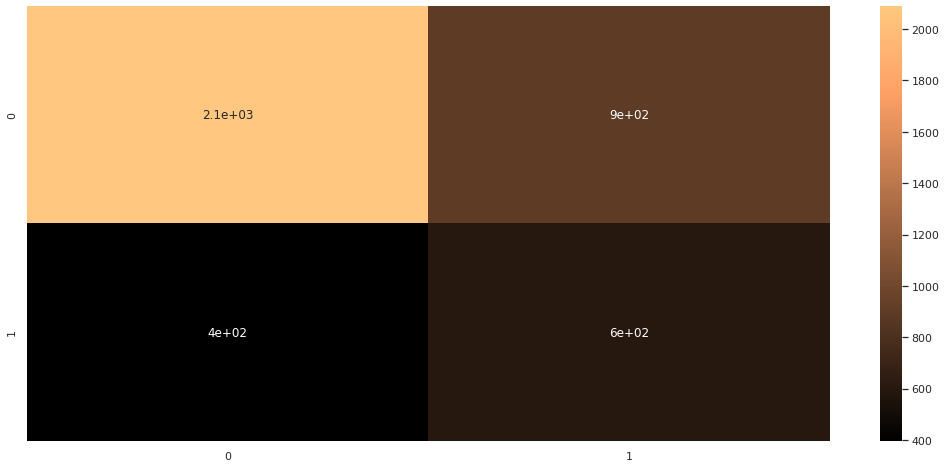

In [ ]:
#* Classification Evaluation
gbrReport = classification_report(y_test, classificationResult)
print(gbrReport)
gbrScore = f1_score(y_test, classificationResult)
print(gbrScore)
rocAucScore = roc_auc_score(y_test, classificationResult)
print(rocAucScore)

#* Confusion Matrix
cm = confusion_matrix(y_test, classificationResult)
sns.heatmap(cm, annot=True, cmap='copper')

cm = pd.DataFrame(cm)
cm

In [ ]:
pickle.dump(gbr_model, open("drive/MyDrive/Colab Notebooks/GMSP/gbr1", "wb"))

### Hyperparameter tuning for GBR

In [ ]:
search = GridSearchCV(estimator = GradientBoostingRegressor(),
                      param_grid = {
                            'learning_rate': [0.1, 0.01],
                            'min_samples_split': [4, 8, 10],
                            'max_depth': [5, 7],
                            'subsample': [0.2, 0.4]
                      },
                      scoring = 'r2',
                      n_jobs = 8,
                      verbose = 1)

In [ ]:
search.fit(x_train, y_train)
search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed: 10.9min finished


{'learning_rate': 0.1,
 'max_depth': 7,
 'min_samples_split': 4,
 'subsample': 0.4}

In [ ]:
#* Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 7,
                                      min_samples_split = 8, subsample = 0.4)
gbr_model.fit(x_train, y_train)
gbrPreds = gbr_model.predict(x_test)

gbrScore = gbr_model.score(x_test, y_test)
gbr_rocAuc = roc_auc_score(y_test, gbrPreds)

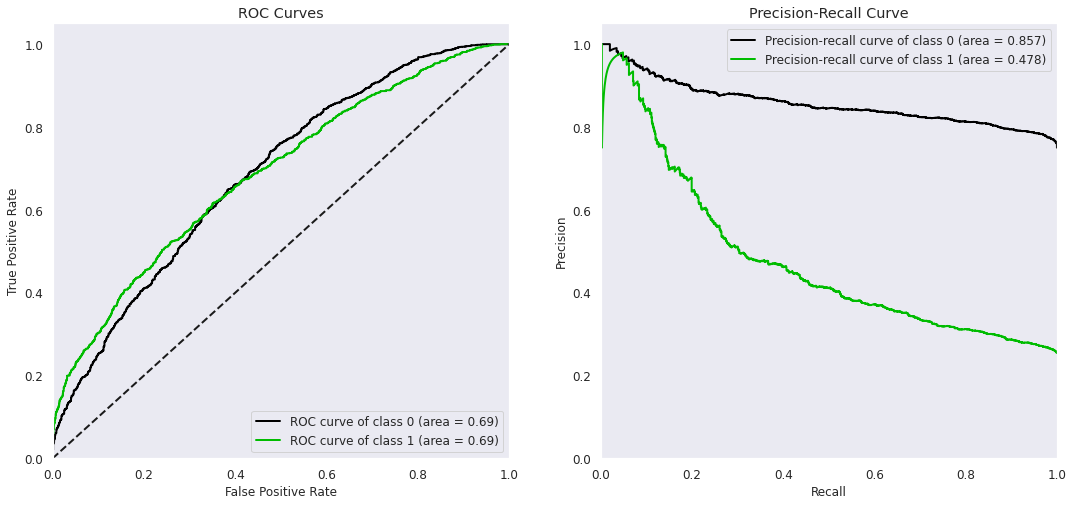

In [ ]:
#* Plot roc-auc curve
sns.set(style = 'dark', rc = {
    'figure.figsize': (18, 8)
})
fig, axes = plt.subplots(1, 2)

skplt.metrics.plot_roc(y_test, np.column_stack((1 - gbrPreds, gbrPreds)), plot_macro=False, plot_micro=False, ax=axes[0])
skplt.metrics.plot_precision_recall(y_test, np.column_stack((1 - gbrPreds, gbrPreds)), plot_micro=False, ax=axes[1])

In [ ]:
# Classifying trips whereby the prediction is greater than 0.8 as dangerous trips
classificationResult = np.where(gbcPreds > 0.8, 1, 0)

              precision    recall  f1-score   support

           0       0.84      0.70      0.76      2983
           1       0.40      0.60      0.48       997

    accuracy                           0.68      3980
   macro avg       0.62      0.65      0.62      3980
weighted avg       0.73      0.68      0.69      3980

0.4827586206896552
0.651888955502108


,0,1
0,2088,895
1,395,602


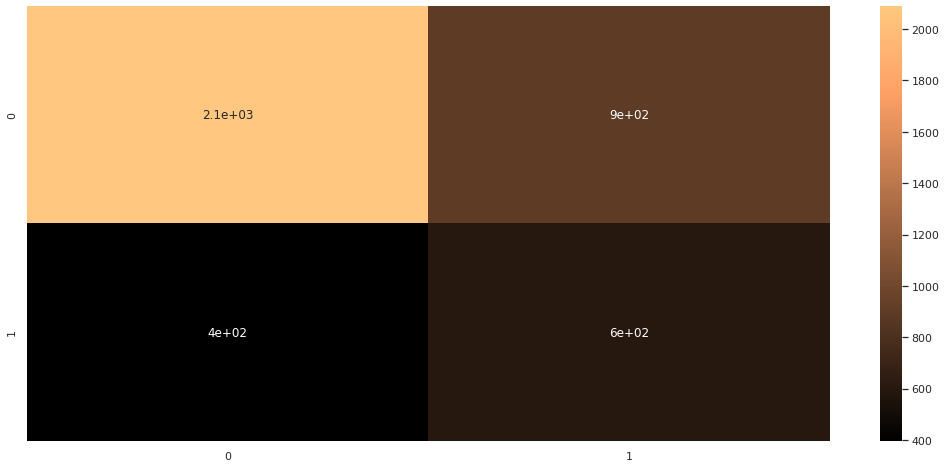

In [ ]:
#* Classification Evaluation
gbrReport = classification_report(y_test, classificationResult)
print(gbrReport)
gbrScore = f1_score(y_test, classificationResult)
print(gbrScore)
rocAucScore = roc_auc_score(y_test, classificationResult)
print(rocAucScore)

#* Confusion Matrix
cm = confusion_matrix(y_test, classificationResult)
sns.heatmap(cm, annot=True, cmap='copper')

cm = pd.DataFrame(cm)
cm

In [ ]:
pickle.dump(gbr_model, open("drive/MyDrive/Colab Notebooks/GMSP/gbr2", "wb"))

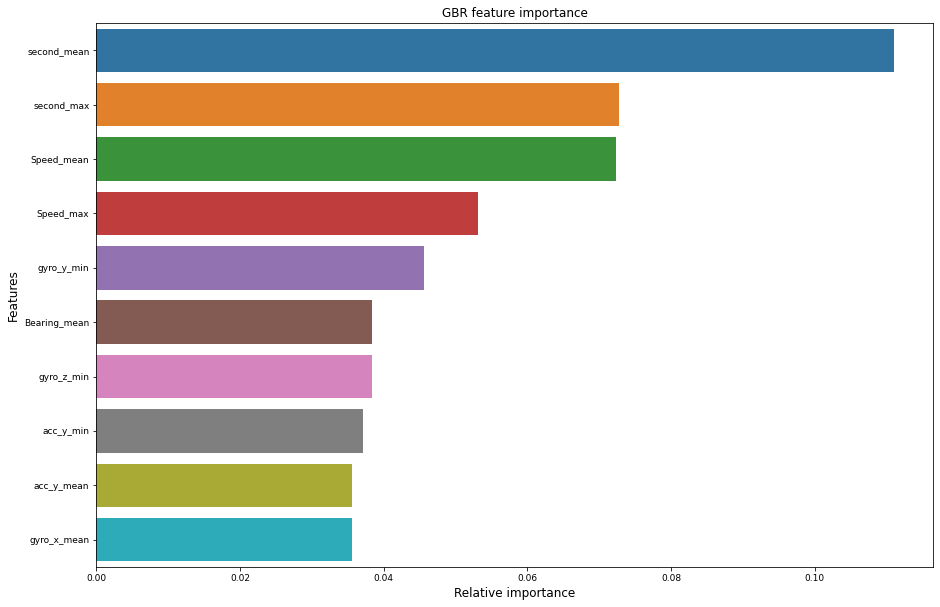

In [ ]:
# Showing feature importance for models that are able to
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, sharex="all", figsize=(15, 10))

names_classifiers = [("GBR",gbr_model)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:10]
        g = sns.barplot(y=trainingDf.columns[indices][:10],x = classifier.feature_importances_[indices][:10] , orient='h')
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1